In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import cv2
import os
import numpy as np
from shapely import geometry
from faces_clustering import get_files_folder, VideoClustering, is_image
from faces_viewport import extract_frames, detect_faces, detect_faces_viewports, show_bounds, non_maximum_supression

Using TensorFlow backend.


## Extracting Frames

In [2]:
video_path = 'C:/Users/paulo/Pictures/test_faces/rick_rolled/'

In [3]:
dir_path = video_path.split('.')[0]
dir_path

'C:/Users/paulo/Pictures/test_faces/rick_rolled/'

In [4]:
#dir_path = extract_frames(video_path)

## Extracting Viewports

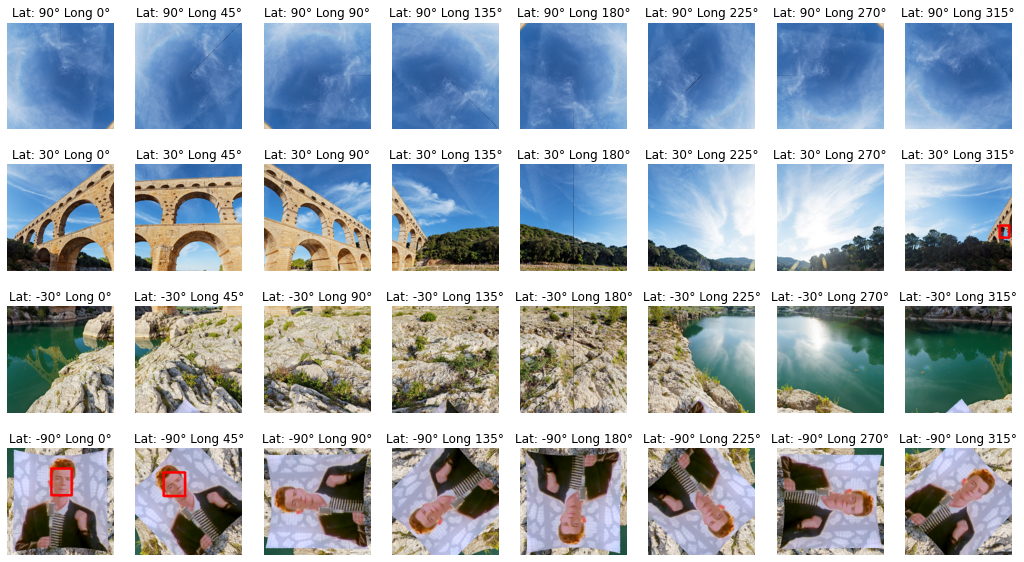

In [11]:
equ, eq_bounds, all_confs = detect_faces_viewports("C:/Users/paulo/Pictures/test_faces/rick_rolled/lat 90 long 0.png", 
                                                   rows = 4, cols = 8, fovw = 60, fovh = 60, width = 300, verbose = 1)

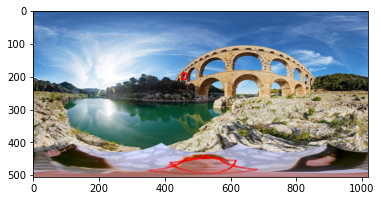

In [12]:
eq_img = np.uint16(equ._img[:,:,::-1])

img = show_bounds(eq_img, eq_bounds)

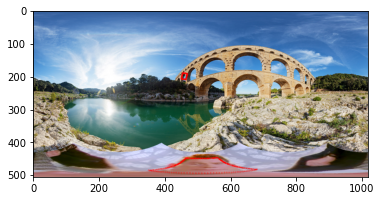

In [13]:
polys = [geometry.Polygon(eq_bound).buffer(0) for eq_bound in eq_bounds]

D = non_maximum_supression(polys, all_confs.copy(), 0.3)
nms_bounds = [eq_bounds[d] for d in D]

img = show_bounds(eq_img, nms_bounds)